In [80]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [81]:
my_data=pd.read_csv("Datasets/Drug prescription Dataset.csv", delimiter=",")

In [82]:
my_data[0:5]

,disease,age,gender,severity,drug
0,diarrhea,4,male,LOW,promegranate drink
1,diarrhea,4,male,NORMAL,lime juice
2,diarrhea,5,male,LOW,promegranate drink
3,diarrhea,5,male,NORMAL,lime juice
4,diarrhea,6,male,LOW,promegranate drink


In [83]:
my_data.shape

(1288, 5)

<div href="pre-processing">
    <h2>Pre-processing</h2>
</div>


In [84]:
duplicate = my_data.duplicated()
 
print("Duplicate Rows :")
 
# Displaying the resultant Dataframe
duplicate

Duplicate Rows :


0       False
1       False
2       False
3       False
4       False
        ...  
1283    False
1284    False
1285    False
1286    False
1287    False
Length: 1288, dtype: bool

In [85]:
# Checking the total count of Duplicate Values
duplicate_rows = my_data[my_data.duplicated()]
print("Duplicate Values :", len(duplicate_rows))

Duplicate Values : 0


In [86]:
duplicate_vals = my_data.drop_duplicates()
duplicate_vals

,disease,age,gender,severity,drug
0,diarrhea,4,male,LOW,promegranate drink
1,diarrhea,4,male,NORMAL,lime juice
2,diarrhea,5,male,LOW,promegranate drink
3,diarrhea,5,male,NORMAL,lime juice
4,diarrhea,6,male,LOW,promegranate drink
...,...,...,...,...,...
1283,diarrhea,60,male,NORMAL,kutajarishta
1284,diarrhea,60,male,LOW,ajamodarka
1285,diarrhea,60,female,HIGH,sitopaladi churna
1286,diarrhea,60,female,NORMAL,kutajarishta


In [87]:
my_data.shape

(1288, 5)

In [88]:
X = my_data[["disease","age","gender","severity"]].values
X[0:5]

array([['diarrhea', 4, 'male', 'LOW'],
       ['diarrhea', 4, 'male', 'NORMAL'],
       ['diarrhea', 5, 'male', 'LOW'],
       ['diarrhea', 5, 'male', 'NORMAL'],
       ['diarrhea', 6, 'male', 'LOW']], dtype=object)

In [89]:
my_data.isnull().sum()

disease     0
age         0
gender      0
severity    0
drug        0
dtype: int64

In [90]:
my_data.isnull().values.any()

False

In [91]:
y = my_data["drug"]
y[0:10]

0    promegranate drink
1            lime juice
2    promegranate drink
3            lime juice
4    promegranate drink
5            lime juice
6    promegranate drink
7            lime juice
8    promegranate drink
9            lime juice
Name: drug, dtype: object

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
import numpy as np
# set random seed for reproducibility
np.random.seed(42)

# load your data
X = my_data[["disease","age","gender","severity"]].values # your feature data
y = my_data["drug"].values # your target data

In [94]:
from sklearn import preprocessing
le_disease = preprocessing.LabelEncoder()
le_disease.fit([  'diarrhea','gastritis','arthritis','migraine'])
X[:,0] = le_disease.transform(X[:,0])

le_gender = preprocessing.LabelEncoder()
le_gender.fit(['female','male'])
X[:,2] = le_gender.transform(X[:,2]) 

  # le_age = preprocessing.LabelEncoder()
  # le_age.fit([   '4',  '5',  '6',  '7',  '8',  '9', '10', '11', '12', '13', '14', '15', '16', '17' ,'18', '19', '20', '21', '22', '23', '24', '25', '26', '27',
  # '28', '29', '30', '31'])
  # X[:,1] = le_age.transform(X[:,1])

le_severity = preprocessing.LabelEncoder()
le_severity.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,3] = le_severity.transform(X[:,3])




X[0:5]

array([[1, 4, 1, 1],
       [1, 4, 1, 2],
       [1, 5, 1, 1],
       [1, 5, 1, 2],
       [1, 6, 1, 1]], dtype=object)

In [95]:
import warnings

# Ignoring User Warnings
warnings.simplefilter(action='ignore', category=UserWarning)

In [96]:
max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [97]:
from sklearn.model_selection import cross_val_score

for max_depth in max_depth_values:
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    scores = cross_val_score(model, X, y, cv=10)
    mean_score = scores.mean()
    print("max_depth = ", max_depth, ":", "mean accuracy = ", mean_score*100 )

max_depth =  1 : mean accuracy =  12.577519379844961
max_depth =  2 : mean accuracy =  21.89437984496124
max_depth =  3 : mean accuracy =  33.77059108527132
max_depth =  4 : mean accuracy =  55.5874515503876
max_depth =  5 : mean accuracy =  70.96051356589147


max_depth =  6 : mean accuracy =  87.42853682170542
max_depth =  7 : mean accuracy =  88.59132751937985
max_depth =  8 : mean accuracy =  90.37548449612402
max_depth =  9 : mean accuracy =  92.0845445736434
max_depth =  10 : mean accuracy =  92.0845445736434


In [98]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=1)

In [99]:
# Save the train data as a CSV file
train_data = pd.DataFrame(X_trainset)
train_data['target'] = y_trainset
train_data.to_csv('Datasets/train_data.csv', index=False)

In [100]:
# Save the test data as a CSV file
test_data = pd.DataFrame(X_testset)
test_data['target'] = y_testset
test_data.to_csv('Datasets/test_data.csv', index=False)

In [101]:
print(X_trainset.shape)
print(y_trainset.shape)

(901, 4)
(901,)


In [102]:
print(X_testset.shape)
print(y_testset.shape)


(387, 4)
(387,)


In [103]:
test_data.isnull().values.any()

False

In [104]:
train_data.isnull().values.any()

False

In [105]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [106]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [107]:
predTree = drugTree.predict(X_testset)

In [108]:
train = drugTree.predict(X_trainset)

In [109]:
print (predTree [0:20])
print (y_testset [0:20])


['panchkol churna' 'Shankh Vati + Shankh Bhasma' 'kutajarishta'
 'jahar mohra pishti' 'Mukta pishti' 'promegranate drink'
 'sitopaladi churna' 'phadke' 'mukta pishti' 'giloy satya'
 'Shankha prakshalana' 'mukta pishti' 'ajamodarka' 'mukta pishti'
 'aamvatantak churna' 'kutajarishta' 'Anu Taila + Shankhapushpi'
 'ashta choornam' 'ajwan water' 'ajamodarka']
['panchkol churna' 'Shankh Vati + Shankh Bhasma' 'kutajarishta'
 'jahar mohra pishti' 'Mukta pishti' 'sanjni vati' 'sitopaladi churna'
 'phadke' 'mukta pishti' 'giloy satya' 'Shankha prakshalana'
 'mukta pishti' 'ajamodarka' 'mukta pishti' 'aamvatantak churna'
 'kutajarishta' 'Anu Taila + Shankhapushpi' 'ashta choornam'
 'suhunjana beej' 'ajamodarka']


In [110]:
from sklearn import metrics
import matplotlib.pyplot as plt
predictions_test =  metrics.accuracy_score(y_testset, predTree)
print("DecisionTrees's Testing Accuracy: ",predictions_test)

DecisionTrees's Testing Accuracy:  0.9534883720930233


In [111]:
correct_labels=(predTree==y_testset).sum()
total_labels=y_testset.shape[0]
print("Testing Accuracy:",(correct_labels/total_labels))

Testing Accuracy: 0.9534883720930233


In [112]:
from sklearn.metrics import accuracy_score
predictions_train = drugTree.predict(X_trainset)
Train_acc = accuracy_score(y_trainset,predictions_train)
print("DecisionTrees's Training Accuracy: ",Train_acc)

DecisionTrees's Training Accuracy:  0.9755826859045506


In [113]:
from sklearn.metrics import classification_report,confusion_matrix

In [114]:
print(classification_report(y_testset, predTree, zero_division = 1))
# Generating the confusion matrix for evaluating the testing corpus
conf_matrix = confusion_matrix(y_testset, predTree)
print("Confusion Matrix:")
print(conf_matrix)

                             precision    recall  f1-score   support

  Anu Taila + Shankhapushpi       1.00      1.00      1.00        16
         Chandraprabha vati       1.00      1.00      1.00        13
  Jatamansi + Shankhapushpi       1.00      1.00      1.00        16
                Jyotishmati       1.00      0.60      0.75         5
                 Mudgaparni       1.00      1.00      1.00         5
               Mukta pishti       1.00      1.00      1.00        11
Shankh Vati + Shankh Bhasma       1.00      1.00      1.00         7
        Shankha prakshalana       1.00      1.00      1.00        14
       Vasant Kusumakar Ras       1.00      1.00      1.00         5
         aamvatantak churna       1.00      1.00      1.00        12
                 ajamodarka       1.00      1.00      1.00        24
                ajwan water       0.33      1.00      0.50         1
                akik pishti       1.00      1.00      1.00         5
             ashta choornam      

In [115]:
print(classification_report(y_trainset,predictions_train, zero_division = 1))
# Generating the confusion matrix for evaluating the training corpus
from sklearn.metrics import confusion_matrix
 
predictions_train = drugTree.predict(X_trainset)
confusion_matrix_train = confusion_matrix(y_trainset, predictions_train)
print("Confusion matrix (training):\n", confusion_matrix_train)

                             precision    recall  f1-score   support

  Anu Taila + Shankhapushpi       1.00      1.00      1.00        24
         Chandraprabha vati       1.00      1.00      1.00        31
  Jatamansi + Shankhapushpi       1.00      1.00      1.00        24
                Jyotishmati       1.00      1.00      1.00        11
                 Mudgaparni       1.00      1.00      1.00        11
               Mukta pishti       1.00      1.00      1.00        33
Shankh Vati + Shankh Bhasma       1.00      1.00      1.00        33
        Shankha prakshalana       1.00      1.00      1.00        30
       Vasant Kusumakar Ras       1.00      1.00      1.00        11
         aamvatantak churna       1.00      1.00      1.00        28
                 ajamodarka       0.90      1.00      0.95        36
                ajwan water       0.33      1.00      0.50         1
                akik pishti       1.00      1.00      1.00        11
             ashta choornam      

In [116]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
conf_matrix = confusion_matrix(y_testset, predTree )
print(conf_matrix)

[[16  0  0 ...  0  0  0]
 [ 0 13  0 ...  0  0  0]
 [ 0  0 16 ...  0  0  0]
 ...
 [ 0  0  0 ... 11  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0 11]]


Train score 0.9755826859045506
Test score 0.9534883720930233


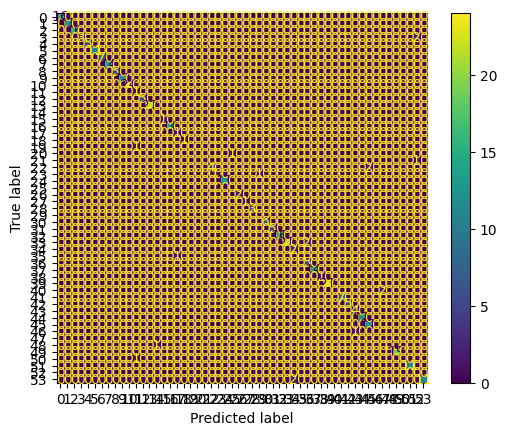

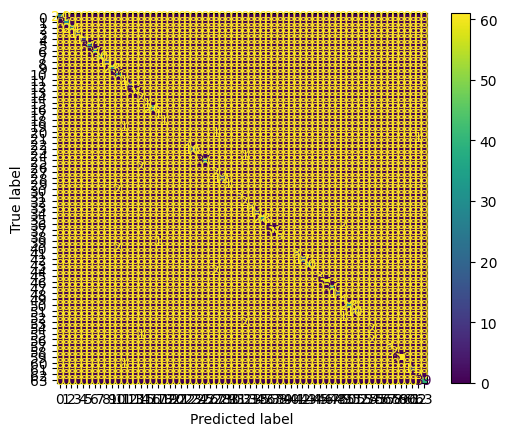

In [118]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
print(f'Train score {accuracy_score(train,y_trainset)}')
print(f'Test score {accuracy_score(predTree,y_testset)}')
conf_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
conf_train = ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_train)
conf_test.plot()
conf_train.plot()

In [119]:
import pickle 
pickle.dump(drugTree,open("drugTree.pkl","wb"))

In [120]:
model = pickle.load(open("drugTree.pkl","rb"))
model.predict(X_testset)

array(['panchkol churna', 'Shankh Vati + Shankh Bhasma', 'kutajarishta',
       'jahar mohra pishti', 'Mukta pishti', 'promegranate drink',
       'sitopaladi churna', 'phadke', 'mukta pishti', 'giloy satya',
       'Shankha prakshalana', 'mukta pishti', 'ajamodarka',
       'mukta pishti', 'aamvatantak churna', 'kutajarishta',
       'Anu Taila + Shankhapushpi', 'ashta choornam', 'ajwan water',
       'ajamodarka', 'kutajarishta', 'Shankh Vati + Shankh Bhasma',
       'Vasant Kusumakar Ras', 'akik pishti', 'kutajarishta',
       'Chandraprabha vati', 'ajamodarka', 'ashta choornam',
       'boswellia curcumin', 'shankh bhasma', 'ashta choornam',
       'jahar mohra pishti', 'ajamodarka', 'ashta choornam',
       'lavan bhasker churna', 'phadke', 'aamvatantak churna',
       'kamdhudha ras', 'mukta pishti', 'kutajarishta', 'ajamodarka',
       'ajamodarka', 'panchkol churna', 'Anu Taila + Shankhapushpi',
       'Chandraprabha vati', 'ashta choornam', 'Vasant Kusumakar Ras',
       'Mukt

In [121]:
print(model.predict([[1, 19, 1, 0]]))

['tribhuvan kirti rasa']
